In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.cm as cm
import numpy as np
import pandas as pd
#from colorspacious import cspace_converter

In [8]:
file = r'D:\UNI\MILJOETEK\4. semester\Data\MDU LCA.xlsx'
data = pd.read_excel(file, skiprows=[0]) #https://stackoverflow.com/questions/45892612/exclude-first-row-when-importing-data-from-excel-into-python

In [9]:
#MDU
MDU_share = data['Share - MDU'].to_list()
MDU_share = MDU_share[0:11]
MDU_mass = data['Kg - MDU'].to_list()
MDU_mass = MDU_mass[0:11]
MDU_items = data['Chemicals'].to_list()
MDU_items = MDU_items[0:11]

In [10]:
#CDU
CDU_share = data['Share - CDU'].to_list()
CDU_share = CDU_share[0:10]
CDU_mass = data['Kg - CDU'].to_list()
CDU_mass = CDU_mass[0:10]
CDU_items = data['Chemicals.1'].to_list()
CDU_items = CDU_items[0:10]

In [11]:
# Create a figure and axis object
cmap = plt.cm.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1, 12)]

colors_MDU = colors[:11]
colors_CDU = colors[:9]
colors_CDU.append(colors[11:])


C:\Users\rwint\AppData\Local\Temp\ipykernel_15000\2047297879.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20')


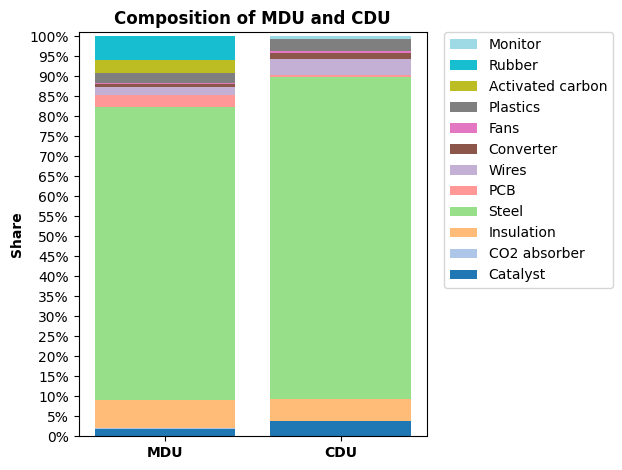

In [19]:
fig, ax = plt.subplots()

# Calculate the positions for the bars
x = np.arange(2)

# Plot the stacked bar for MDU
bottom_MDU = np.zeros(1)
for i, (share, item) in enumerate(zip(MDU_share, MDU_items)):
    ax.bar(x[0], share, bottom=bottom_MDU, label=item, color=colors_MDU[i])
    bottom_MDU += share

# Plot the stacked bar for CDU
bottom_CDU = np.zeros(1)
for i, (share, item) in enumerate(zip(CDU_share, CDU_items)):
    ax.bar(x[1], share, bottom=bottom_CDU, label=item, color=colors_CDU[i])
    bottom_CDU += share

ax.set_ylabel('Share', weight='bold')
ax.set_title('Composition of MDU and CDU', weight='bold')

ax.set_xticks(x)
plt.ylim(0, 1.01)
plt.yticks(np.arange(0, 1.01, step=0.05))
ax.set_xticklabels(['MDU', 'CDU'], weight='bold')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))

# Create a custom legend with unique items
handles, labels = ax.get_legend_handles_labels()
unique_labels, unique_handles = [], []
for handle, label in zip(handles, labels):
    if label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handle)

# Reverse the order of the legend items
unique_labels.reverse()
unique_handles.reverse()

ax.legend(unique_handles, unique_labels, bbox_to_anchor=(1.05, 1), borderaxespad=0)

# Show the plot
plt.tight_layout()
plt.savefig('MDU_CDU_composition.jpg', bbox_inches='tight')
plt.show()